In [3]:
!pip install -U finance-datareader

In [4]:
!pip install matplotlib

     ---------------------------------------- 0.0/7.2 MB ? eta -:--:--
     ----- ---------------------------------- 1.0/7.2 MB 33.4 MB/s eta 0:00:01
     ----------------------------- ---------- 5.2/7.2 MB 55.7 MB/s eta 0:00:01
     ---------------------------------------- 7.2/7.2 MB 57.7 MB/s eta 0:00:00
  Using cached kiwisolver-1.4.4-cp39-cp39-win_amd64.whl (55 kB)
     ---------------------------------------- 0.0/160.2 kB ? eta -:--:--
     ---------------------------------------- 160.2/160.2 kB ? eta 0:00:00
  Using cached pyparsing-3.0.9-py3-none-any.whl (98 kB)
     ---------------------------------------- 0.0/2.5 MB ? eta -:--:--
     ---------------------------------------- 2.5/2.5 MB 166.0 MB/s eta 0:00:00
  Using cached fonttools-4.38.0-py3-none-any.whl (965 kB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)


In [5]:
import FinanceDataReader as fdr
import pandas as pd
%matplotlib inline
df = fdr.DataReader('AAPL', '2018')
df.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,42.540001,43.075001,42.314999,43.064999,40.950500,102223600
2018-01-03,43.132500,43.637501,42.990002,43.057499,40.943359,118071600
2018-01-04,43.134998,43.367500,43.020000,43.257500,41.133533,89738400
2018-01-05,43.360001,43.842499,43.262501,43.750000,41.601856,94640000
2018-01-08,43.587502,43.902500,43.482498,43.587502,41.447350,82271200
2018-01-09,43.637501,43.764999,43.352501,43.582500,41.442581,86336000
2018-01-10,43.290001,43.575001,43.250000,43.572498,41.433075,95839600
2018-01-11,43.647499,43.872501,43.622501,43.820000,41.668427,74670800
2018-01-12,44.044998,44.340000,43.912498,44.272499,42.098709,101672400


In [6]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-02-02,148.899994,151.179993,148.169998,150.820007,150.820007,118339000
2023-02-03,148.029999,157.380005,147.830002,154.500000,154.500000,154279900
2023-02-06,152.570007,153.100006,150.779999,151.729996,151.729996,69858300
2023-02-07,150.639999,155.229996,150.639999,154.649994,154.649994,83322600
2023-02-08,153.880005,154.580002,151.169998,151.919998,151.919998,64038100


## 2018년 부터 2022년 말 까지 몇 퍼센트 상승했는가?

- diff: 변화량
- pct_change: 변화율

In [17]:
start_close = df['Close'].loc['2018-01-02']
end_close = df['Close'].loc['2022-12-30'] # 31은 값이 없음(주말인듯)

rise_rate = (end_close - start_close) / start_close * 100
print(start_close, end_close, rise_rate)

43.064999 129.929993 201.7067131477235


## 2022년 최저점은 언제인가?

In [18]:
df['Close'].loc['2022-01-01':'2022-12-31']

Date
2022-01-03    182.009995
2022-01-04    179.699997
2022-01-05    174.919998
2022-01-06    172.000000
2022-01-07    172.169998
                 ...    
2022-12-23    131.860001
2022-12-27    130.029999
2022-12-28    126.040001
2022-12-29    129.610001
2022-12-30    129.929993
Name: Close, Length: 251, dtype: float64

In [19]:
df['Close'].loc['2022-01-01':'2022-12-31'].idxmin()

Timestamp('2022-12-28 00:00:00')

## 주어진 데이터의 주식 종가가 가장 높았던 날짜는 언제인가?(총 10일)

In [20]:
df['Close'].sort_values(ascending = False).head(10)

Date
2022-01-03    182.009995
2021-12-27    180.330002
2022-01-04    179.699997
2021-12-10    179.449997
2021-12-29    179.380005
2021-12-15    179.300003
2021-12-28    179.289993
2022-03-29    178.960007
2022-04-04    178.440002
2021-12-30    178.199997
Name: Close, dtype: float64

## 연도별 평균 주가 막대그래프로 시각화하기

<AxesSubplot: xlabel='Date'>

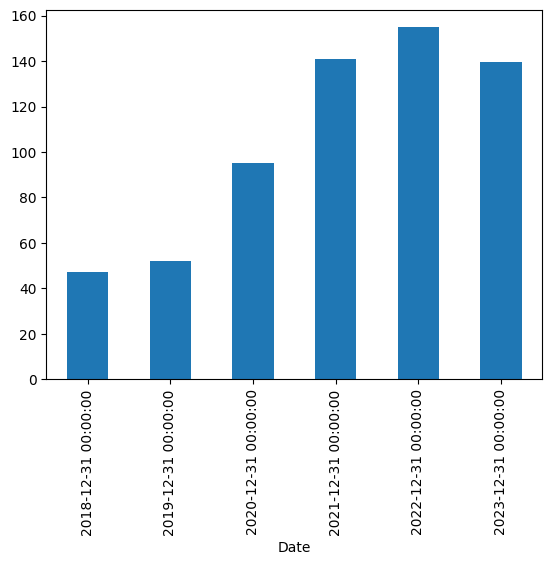

In [21]:
df['Close'].resample('Y').mean().plot.bar()

## 평균 주가 상승률이 가장 컸던 해는 언제입니까?

In [22]:
df['Close'].resample('Y').mean().pct_change()

Date
2018-12-31         NaN
2019-12-31    0.101572
2020-12-31    0.831344
2021-12-31    0.478696
2022-12-31    0.098204
2023-12-31   -0.099630
Freq: A-DEC, Name: Close, dtype: float64

In [23]:
df['Close'].resample('Y').mean().pct_change().sort_values(ascending = False)

Date
2020-12-31    0.831344
2021-12-31    0.478696
2019-12-31    0.101572
2022-12-31    0.098204
2023-12-31   -0.099630
2018-12-31         NaN
Name: Close, dtype: float64

## 50일 이동평균, 200일 이동평균, 종가를 하나의 그래프에 lineplot으로 그리세요.

<AxesSubplot: xlabel='Date'>

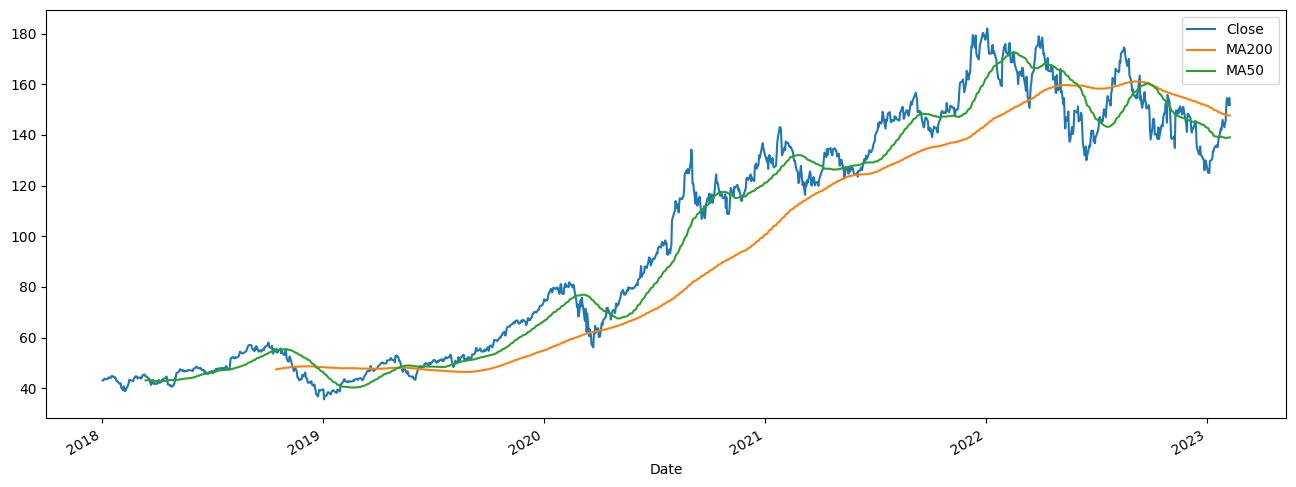

In [24]:
df['MA50'] = df['Close'].rolling(window = 50).mean() # MA = moving average
df['MA200'] = df['Close'].rolling(window = 200).mean()
df[['Close', 'MA200', 'MA50']].plot(figsize=(16,6)) # 그릴 것만 데이터프레임으로 가져와서 plot

## 2018년 고점을 2019년 이후 언제 최초로 돌파했는가?

In [26]:
df2018 = df.loc['2018-01-01':'2019-01-01']
df2018['Close'].idxmax() # 언제가 고점인지

Timestamp('2018-10-03 00:00:00')

In [29]:
high_price_2018 = df2018['Close'].max() # 고점이 얼마인지
high_price_2018

58.017502

In [28]:
after2019 = df.loc['2019-01-01':]
after2019.head()

,Open,High,Low,Close,Adj Close,Volume,MA50,MA200
Date,,,,,,,,
2019-01-02,38.722500,39.712502,38.557499,39.480000,38.105137,148158800,46.26605,48.297038
2019-01-03,35.994999,36.430000,35.500000,35.547501,34.309589,365248800,45.88045,48.255650
2019-01-04,36.132500,37.137501,35.950001,37.064999,35.774231,234428400,45.51850,48.221925
2019-01-07,37.174999,37.207500,36.474998,36.982498,35.694611,219111200,45.14450,48.192750
2019-01-08,37.389999,37.955002,37.130001,37.687500,36.375057,164101200,44.82280,48.170125


In [30]:
after2019['Close'] > high_price_2018 # 불린 추출로 가져옴

Date
2019-01-02    False
2019-01-03    False
2019-01-04    False
2019-01-07    False
2019-01-08    False
              ...  
2023-02-02     True
2023-02-03     True
2023-02-06     True
2023-02-07     True
2023-02-08     True
Name: Close, Length: 1034, dtype: bool

In [31]:
after2019[after2019['Close'] > high_price_2018].sort_index()

,Open,High,Low,Close,Adj Close,Volume,MA50,MA200
Date,,,,,,,,
2019-10-11,58.237499,59.410000,58.077499,59.052502,57.679241,166795600,53.483550,48.147187
2019-10-14,58.724998,59.532501,58.667500,58.967499,57.596214,96427600,53.642800,48.246837
2019-10-15,59.097500,59.412498,58.720001,58.830002,57.461922,87360000,53.852700,48.345700
2019-10-16,58.342499,58.810001,58.299999,58.592499,57.229931,73903200,54.039550,48.441487
2019-10-17,58.772499,59.037498,58.380001,58.820000,57.452137,67585200,54.220750,48.538187
...,...,...,...,...,...,...,...,...
2023-02-02,148.899994,151.179993,148.169998,150.820007,150.820007,118339000,138.760600,147.866250
2023-02-03,148.029999,157.380005,147.830002,154.500000,154.500000,154279900,138.890400,147.801750
2023-02-06,152.570007,153.100006,150.779999,151.729996,151.729996,69858300,138.921400,147.724250
